In [1]:

import pandas as pd
import numpy as np

import json
import datetime
import math

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns


In [2]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

REGISTER_PATH = "./data/1month/register"
DETAIL_PATH = "./data/1month/detail"
# COMBINED_PATH = "./data/inHosp/combined"

conf = SparkConf().setAppName('ex').setMaster('local[*]')
spark = SparkSession.builder.config(conf=conf).config("spark.driver.memory", "35g").config("spark.local.dir", "/media/data1/data/tmp").getOrCreate()
spark

In [3]:
register = spark.read.parquet(REGISTER_PATH)
detail = spark.read.parquet(DETAIL_PATH)
# combine = spark.read.parquet(COMBINED_PATH)
print(register.count())
print(detail.count())


2322454
30815402


In [4]:
register.dtypes

[('register_no', 'string'),
 ('age', 'int'),
 ('sex', 'string'),
 ('per_type', 'string'),
 ('in_hosp_diagnosiscode', 'string'),
 ('in_hosp_diagnosisname', 'string'),
 ('out_hosp_diagnosisname', 'string'),
 ('out_hosp_diagnosiscode', 'string'),
 ('visit_type', 'string'),
 ('in_hosp_date', 'string'),
 ('out_hosp_date', 'string'),
 ('hosp_no', 'string'),
 ('hosp_level', 'string'),
 ('bill_sum', 'string'),
 ('bill_apply', 'string'),
 ('bill_self', 'string'),
 ('rs_overall_pay', 'string'),
 ('settlement_date', 'string'),
 ('HOSP_NAME', 'string'),
 ('DOCTOR_NAME', 'string'),
 ('PER_NO', 'string'),
 ('dept_name', 'string'),
 ('zone_name', 'string'),
 ('doctor_code', 'string')]

In [5]:
detail.dtypes

[('CHARGE_DETAIL_NO', 'string'),
 ('REGISTER_NO', 'string'),
 ('EXTERNAL_CD_STR_1', 'decimal(20,0)'),
 ('MED_PROJECT_CODE', 'string'),
 ('MED_PROJECT_NAME', 'string'),
 ('PROJECT_TYPE', 'string'),
 ('HOSP_PROJECT_NAME', 'string'),
 ('SETTLEMENT_DATE', 'string'),
 ('RECIPE_DATE', 'string'),
 ('CHARGE_TYPE', 'string'),
 ('MEDICAL_SPECIFICATION', 'string'),
 ('DOSE_FORM', 'string'),
 ('PRICE', 'string'),
 ('QUANTITY', 'string'),
 ('MONEY', 'string'),
 ('CD_OVERALL_PAY', 'string'),
 ('APPLY_AMOUNT', 'string'),
 ('SELF_AMOUNT', 'string'),
 ('HOSP_PROJECT_CODE', 'string')]

In [7]:
rs_sample = register.limit(5000)
rs_id = [row.register_no for row in rs_sample.select("register_no").collect()]

In [8]:
dt_sample = detail.filter(detail['REGISTER_NO'].isin(rs_id))

In [9]:
combine_sample = rs_sample.join(dt_sample, rs_sample.register_no ==dt_sample.REGISTER_NO)

In [10]:
combine_sample_df = combine_sample.toPandas()
combine_sample_df

,register_no,age,sex,per_type,in_hosp_diagnosiscode,in_hosp_diagnosisname,out_hosp_diagnosisname,out_hosp_diagnosiscode,visit_type,in_hosp_date,...,CHARGE_TYPE,MEDICAL_SPECIFICATION,DOSE_FORM,PRICE,QUANTITY,MONEY,CD_OVERALL_PAY,APPLY_AMOUNT,SELF_AMOUNT,HOSP_PROJECT_CODE
0,219851310-1-330522012,81,男,城镇居民,E14.900,糖尿病不伴有并发症,糖尿病不伴有并发症,E14.900,住院,2019-01-02 00:00:00,...,放射费,0,None,130.0,-1.0,-130.0,-104.0,-104.0,0.0,None
1,219731617-1-330522012,27,男,城镇居民,None,None,None,None,门诊,2019-01-04 00:00:00,...,治疗费,次,None,0.0,1.0,0.0,0.0,0.0,0.0,None
2,219799436-1-330522012,36,女,城镇职工,None,None,None,None,门诊,2019-01-07 00:00:00,...,治疗费,次,None,0.0,1.0,0.0,0.0,0.0,0.0,None
3,219804123-1-330522012,72,女,城镇居民,S20.803,胸壁擦伤,胸壁擦伤,S20.803,门诊,2019-01-07 00:00:00,...,治疗费,规格,None,0.2,1.0,0.2,0.0,0.0,0.2,None
4,219851310-1-330522012,81,男,城镇居民,E14.900,糖尿病不伴有并发症,糖尿病不伴有并发症,E14.900,住院,2019-01-02 00:00:00,...,治疗费,0,None,12.0,1.0,12.0,0.0,0.0,12.0,None
5,219905248-1-330522012,46,男,城镇职工,R10.400,腹痛，其他和未特指的,腹痛，其他和未特指的,R10.400,门诊,2019-01-10 00:00:00,...,中草药费,5g*1袋,None,9.0,1.0,36.0,0.0,0.0,36.0,None
6,219939724-1-330522012,11,女,城镇居民,Z29.999,预防性免疫接种,预防性免疫接种,Z29.999,门诊,2019-01-12 00:00:00,...,西药费,规格,无,28.0,1.0,28.0,0.0,0.0,28.0,None
7,219986609-1-330522012,83,女,城镇居民,R07.400,胸痛,急性广泛前壁心肌梗死,I21.007,住院,2019-01-08 00:00:00,...,治疗费,费用,None,12.0,1.0,12.0,0.0,0.0,12.0,None
8,219851310-1-330522012,81,男,城镇居民,E14.900,糖尿病不伴有并发症,糖尿病不伴有并发症,E14.900,住院,2019-01-02 00:00:00,...,材料费,0,None,1.45,1.0,1.45,1.45,1.45,0.0,None
9,219986609-1-330522012,83,女,城镇居民,R07.400,胸痛,急性广泛前壁心肌梗死,I21.007,住院,2019-01-08 00:00:00,...,材料费,费用,None,1.83,1.0,1.83,1.83,1.83,0.0,None


In [11]:
# add age_bin
age_bins = [-1, 18, 28, 38, 48, 58, 68, 78, 88, 120]

combine_sample_df['age_bins'] = pd.cut(combine_sample_df.age, age_bins)


# get ICD3 
combine_sample_df['ICD3'] = combine_sample_df.out_hosp_diagnosiscode.str.slice(0,3)


In [13]:
target_cols = ['register_no', 'age','age_bins', 'sex', 'ICD3', 'visit_type',
               'hosp_level','bill_sum','rs_overall_pay','HOSP_NAME',
               'zone_name','PER_NO','MED_PROJECT_NAME','MONEY']
data = combine_sample_df[target_cols]
data[:5].T

,0,1,2,3,4
register_no,219851310-1-330522012,219731617-1-330522012,219799436-1-330522012,219804123-1-330522012,219851310-1-330522012
age,81,27,36,72,81
age_bins,"(78, 88]","(18, 28]","(28, 38]","(68, 78]","(78, 88]"
sex,男,男,女,女,男
ICD3,E14,None,None,S20,E14
visit_type,住院,门诊,门诊,门诊,住院
hosp_level,二级,二级,二级,一级,二级
bill_sum,7933.76,11.0,19.0,205.44,7933.76
rs_overall_pay,4882.76,8.0,12.0,104.93,4882.76
HOSP_NAME,8953073fc5,90c24c477e,b49b745833,12ae03fd15,8953073fc5


# 饼图： 所有场景的风险金额|涉案件数

In [2]:
df = pd.DataFrame({'场景名称':['分解住院', '重复开药','超标开药'], '涉案金额':[1239.1, 3231.2,1231.3], '单据数目':[100,300,123]})

df

,场景名称,涉案金额,单据数目
0,分解住院,1239.1,100
1,重复开药,3231.2,300
2,超标开药,1231.3,123


In [3]:
# 场景名称X涉案金额
df1 = pd.pivot_table(df, index='场景名称', values = '涉案金额')

df1.dropna(inplace = True)

labels =df1.index
colors = ['cyan','lime','pink']
explode = [0,0,0]
sizes = df1.values

In [13]:
labels,sizes

(Index(['分解住院', '超标开药', '重复开药'], dtype='object', name='场景名称'),
 array([[1239.1],
        [1231.3],
        [3231.2]]))

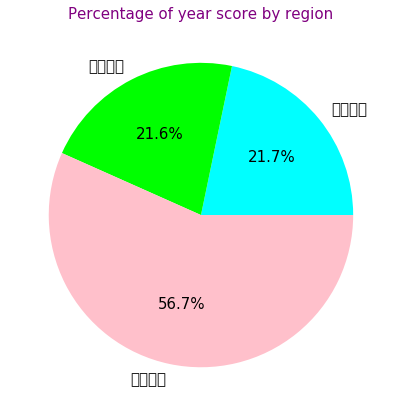

In [14]:
# visual

plt.figure(figsize = (7,7))
plt.pie(np.squeeze(sizes), explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of year score by region',color = 'purple',fontsize = 15)
plt.show()

# 重复收费

### 饼图： 医院等级 X 涉案金额 （代码同上）   

### barplot: top10 disease X 金额

In [14]:
data = data.dropna(subset=['ICD3'])
data['bill_sum'] = pd.to_numeric(data.bill_sum)
data

,register_no,age,age_bins,sex,ICD3,visit_type,hosp_level,bill_sum,rs_overall_pay,HOSP_NAME,zone_name,PER_NO,MED_PROJECT_NAME,MONEY
0,219851310-1-330522012,81,"(78, 88]",男,E14,住院,二级,7933.76,4882.76,8953073fc5,c7cdeaff4b,7d200bf80a,螺旋CT平扫（一个部位）,-130.0
3,219804123-1-330522012,72,"(68, 78]",女,S20,门诊,一级,205.44,104.93,12ae03fd15,c7cdeaff4b,f9f4734545,自费诊疗及服务项目,0.2
4,219851310-1-330522012,81,"(78, 88]",男,E14,住院,二级,7933.76,4882.76,8953073fc5,c7cdeaff4b,7d200bf80a,自费诊疗及服务项目,12.0
5,219905248-1-330522012,46,"(38, 48]",男,R10,门诊,一级,203.24,203.24,8d4c64c678,c7cdeaff4b,2f46b054f3,自费中草药,36.0
6,219939724-1-330522012,11,"(-1, 18]",女,Z29,门诊,一级,177.80,0.0,045bfdc2ba,c7cdeaff4b,1624801474,自费费用,28.0
7,219986609-1-330522012,83,"(78, 88]",女,I21,住院,三级,36214.82,15703.36,e68842b81b,c7cdeaff4b,b8dd333556,自费诊疗及服务项目,12.0
8,219851310-1-330522012,81,"(78, 88]",男,E14,住院,二级,7933.76,4882.76,8953073fc5,c7cdeaff4b,7d200bf80a,一次性真空采血器,1.45
9,219986609-1-330522012,83,"(78, 88]",女,I21,住院,三级,36214.82,15703.36,e68842b81b,c7cdeaff4b,b8dd333556,一次性真空采血器,1.83
10,219818398-1-330522012,49,"(48, 58]",男,CX0,特殊门诊,二级,412.10,0.0,a86de3b575,c7cdeaff4b,881fc2e709,腺苷脱氨酶测定,10.0
11,219877473-1-330522012,57,"(48, 58]",男,C34,住院,三级,2572.84,556.24,68335e9465,c7cdeaff4b,cf4afd0018,血清α-L-岩藻糖苷酶测定,10.0


In [15]:
data_agg = data.groupby(["hosp_level",'ICD3'])[['bill_sum']].sum()
sorted_icd_sum = data_agg[["bill_sum"]].groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('bill_sum',ascending=False).head(20))
sorted_icd_sum

bill_sum
hosp_level ICD3             
一级         I83    4851086.10
           I10    3840074.63
           J98    3779842.66
           K81    2434774.39
           I25    1113561.06
           K29     125592.68
           J06      67968.50
           F48      66894.22
           J40      50842.04
           J20      20737.84
           R42      20401.09
           L30      18260.96
           R05      17605.93
           M54      17257.08
           J39      16924.40
           E14      16906.30
           K02      13514.48
           M25      13498.69
           J02      12866.16
           G47      12035.66
三级         I21   13942705.70
           M06   10496319.90
           K40    5576978.52
           F41    3492073.76
           K35    2022239.10
           K63    1567618.80
           H25    1441954.83
           J15    1330572.27
           H43    1189421.45
           I50    1014572.99
...                      ...
二级         T00    1790378.86
           C25    1328364.72
           J18     990826.56
           R10     918683.18
           R06     883539.15
           N73     866170.36
           O00     818205.00
           K59     707498.06
           Z47     499876.01
           D86     236582.85
无等级        A11     120619.65
           I10      29602.72
           K29      27362.02
           M54      19111.58
           K04      18526.00
           E14      15115.42
           J40      14562.56
           J42      10953.56
           J39      10607.90
           R07       9105.60
           J06       8682.47
           E78       8175.76
           M79       7952.60
           M50       7151.53
           K02       7004.00
           M13       6572.18
           J31       6403.93
           M77       5633.04
           S60       5539.90
           L23       5451.41

[80 rows x 1 columns]

In [16]:
sorted_icd_sum.loc['无等级']

,bill_sum
ICD3,
A11,120619.65
I10,29602.72
K29,27362.02
M54,19111.58
K04,18526.00
E14,15115.42
J40,14562.56
J42,10953.56
J39,10607.90


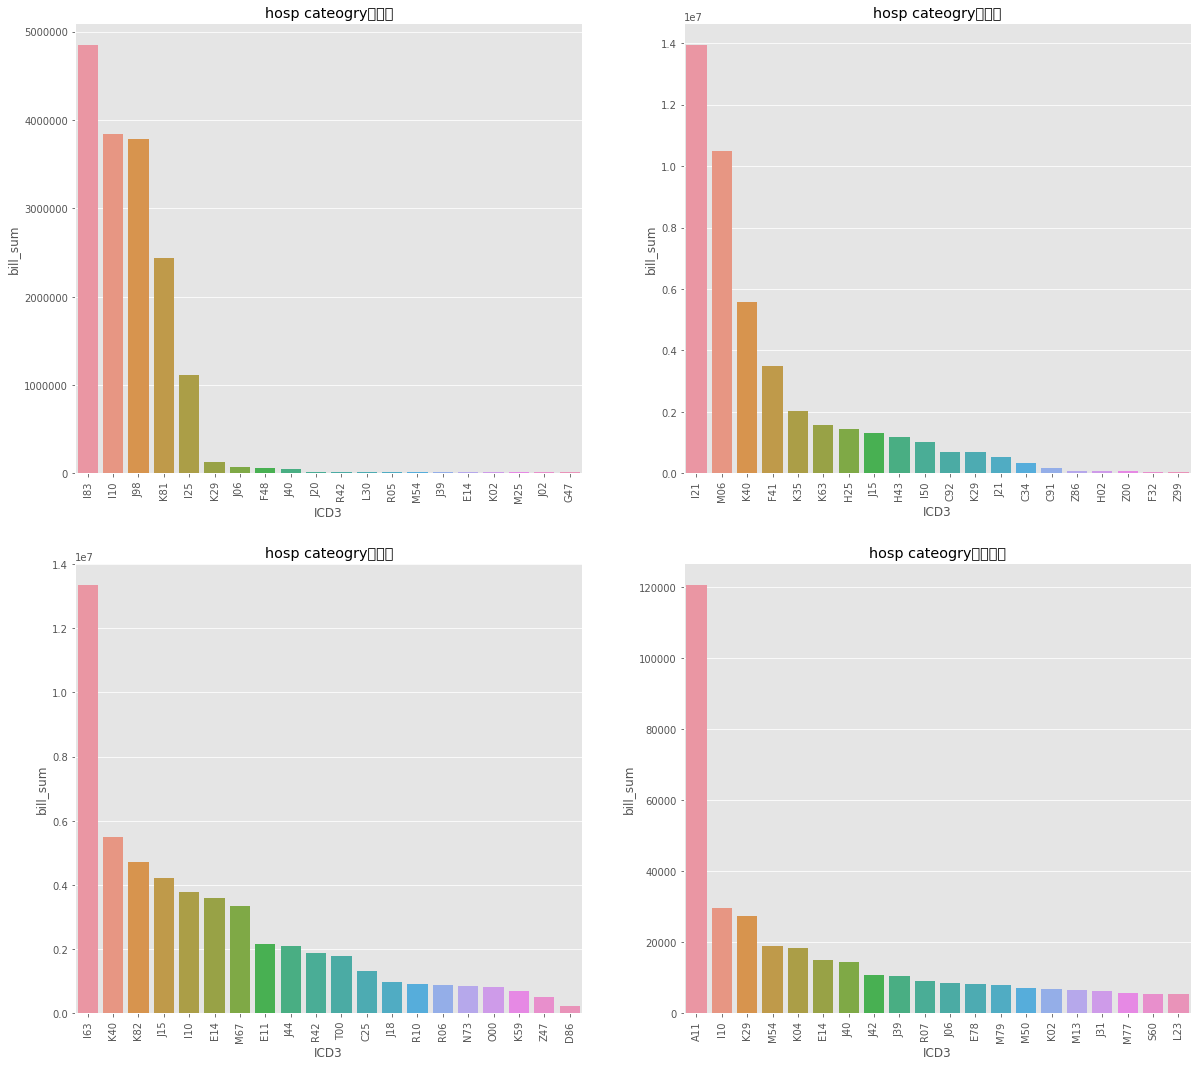

In [99]:

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(top = 1.5  )
for category, subplot in zip(sorted_icd_sum.index.levels[0], ax.flatten()):
    sns.barplot(x = 'ICD3', y='bill_sum',data= sorted_icd_sum.loc[category].reset_index(), ax=subplot).set_title(f'hosp cateogry：{category}')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


# 参保人套药

In [27]:
countries2012 = [
    'Bolivia',
    'Brazil',
    'Sri Lanka',
    'Dominican Republic',
    'Indonesia',
    'Kenya',
    'Honduras',
    'Mozambique',
    'Peru',
    'Philipines',
    'India',
    'Vietnam',
    'Thailand',
    'USA',
    'World'
]

percentage2012 = [ 
    0.042780099,
    0.16599952,
    0.012373058,
    0.019171717,
    0.011868674,
    0.019239173,
    0.00000332,
    0.014455196,
    0.016006654,
    0.132970981,
    0.077940824,
    0.411752517,
    0.017986798,
    0.017361808,
    0.058076027
]

countries2013 = [
    'Bolivia',
    'Brazil',
    'Sri Lanka',
    'Dominican Republic', 
    'Indonesia', 
    'Honduras',
    'Mozambique', 
    'Peru', 
    'Philippines', 
    'India', 
    'Vietnam', 
    'Thailand', 
    'USA',
    'World'  
]

percentage2013 = [
    0.02736294,
    0.117160272, 
    0.015815952 ,
    0.018831589,
    0.020409103 ,
    0.00000000285,
    0.018876854,
    0.018998639,
    0.117221146,
    0.067991687,
    0.496110972,
    0.019309486,
    0.026880553,
    0.03503080414999993
]
import pandas as pd
df = pd.concat([pd.DataFrame({2012:percentage2012}, index=countries2012),
                pd.DataFrame({2013:percentage2013}, index=countries2013)],
               axis=1, sort=False)
df

,2012,2013
Bolivia,0.042780,2.736294e-02
Brazil,0.166000,1.171603e-01
Sri Lanka,0.012373,1.581595e-02
Dominican Republic,0.019172,1.883159e-02
Indonesia,0.011869,2.040910e-02
Kenya,0.019239,NaN
Honduras,0.000003,2.850000e-09
Mozambique,0.014455,1.887685e-02
Peru,0.016007,1.899864e-02
Philipines,0.132971,NaN


In [67]:
data.T

,0,3,4,5,6,7,8,9,10,11,...,34890,34891,34892,34893,34894,34895,34896,34897,34898,34899
register_no,219851310-1-330522012,219804123-1-330522012,219851310-1-330522012,219905248-1-330522012,219939724-1-330522012,219986609-1-330522012,219851310-1-330522012,219986609-1-330522012,219818398-1-330522012,219877473-1-330522012,...,990688102431-1-330599012,990687625111-1-330599012,990684617941-1-330599012,990687304711-1-330599012-27,990684255561-1-330599012,990684105391-1-330599012-27,990683299131-1-330599012,990685808791-1-330599012,990684581021-1-330599012-27,219642253-1-330522012
age,81,72,81,46,11,83,81,83,49,57,...,41,48,71,75,75,59,32,59,67,45
age_bins,"(78, 88]","(68, 78]","(78, 88]","(38, 48]","(-1, 18]","(78, 88]","(78, 88]","(78, 88]","(48, 58]","(48, 58]",...,"(38, 48]","(38, 48]","(68, 78]","(68, 78]","(68, 78]","(58, 68]","(28, 38]","(58, 68]","(58, 68]","(38, 48]"
sex,男,女,男,男,女,女,男,女,男,男,...,女,男,女,女,男,女,男,女,男,女
ICD3,E14,S20,E14,R10,Z29,I21,E14,I21,CX0,C34,...,J06,M79,I50,Z43,Z00,I83,I10,M13,K51,N76
visit_type,住院,门诊,住院,门诊,门诊,住院,住院,住院,特殊门诊,住院,...,门诊,门诊,住院,住院,门诊,住院,门诊,门诊,门诊,门诊
hosp_level,二级,一级,二级,一级,一级,三级,二级,三级,二级,三级,...,一级,一级,三级,三级,三级,一级,一级,三级,二级,二级
bill_sum,7933.76,205.44,7933.76,203.24,177.8,36214.8,7933.76,36214.8,412.1,2572.84,...,76.07,41.2,4935.17,921.51,48,15138.8,81.4,204.05,466.66,397
rs_overall_pay,4882.76,104.93,4882.76,203.24,0.0,15703.36,4882.76,15703.36,0.0,556.24,...,76.07,39.39,3829.24,0.0,48.0,9528.65,77.83,204.05,112.58,397.0
HOSP_NAME,8953073fc5,12ae03fd15,8953073fc5,8d4c64c678,045bfdc2ba,e68842b81b,8953073fc5,e68842b81b,a86de3b575,68335e9465,...,1bf93a3c28,a07240850b,aedb1880ec,3b8a405197,ed37a03b18,4e44a2b7df,db6417a678,ed37a03b18,60aba4c49f,a86de3b575


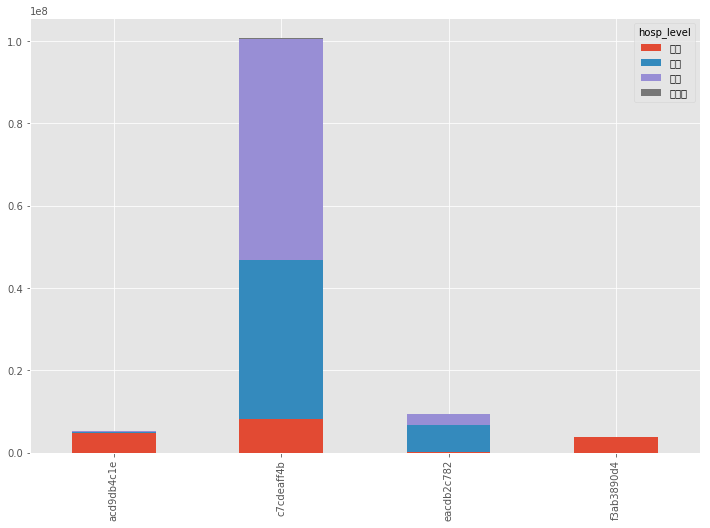

In [68]:
## 统筹区金额分布
data_agg = data.groupby(['hosp_level',"zone_name"])[['bill_sum']].sum()
def expand(df):
    output = {}
    for index, row in df.iterrows():
        output[row['zone_name']] = [row['bill_sum']]
    return pd.DataFrame.from_dict(output).reset_index(drop=True)


data_agg.reset_index().groupby('hosp_level').apply(expand).reset_index().\
drop('level_1',axis=1).set_index('hosp_level').T.plot(kind='bar', stacked=True)


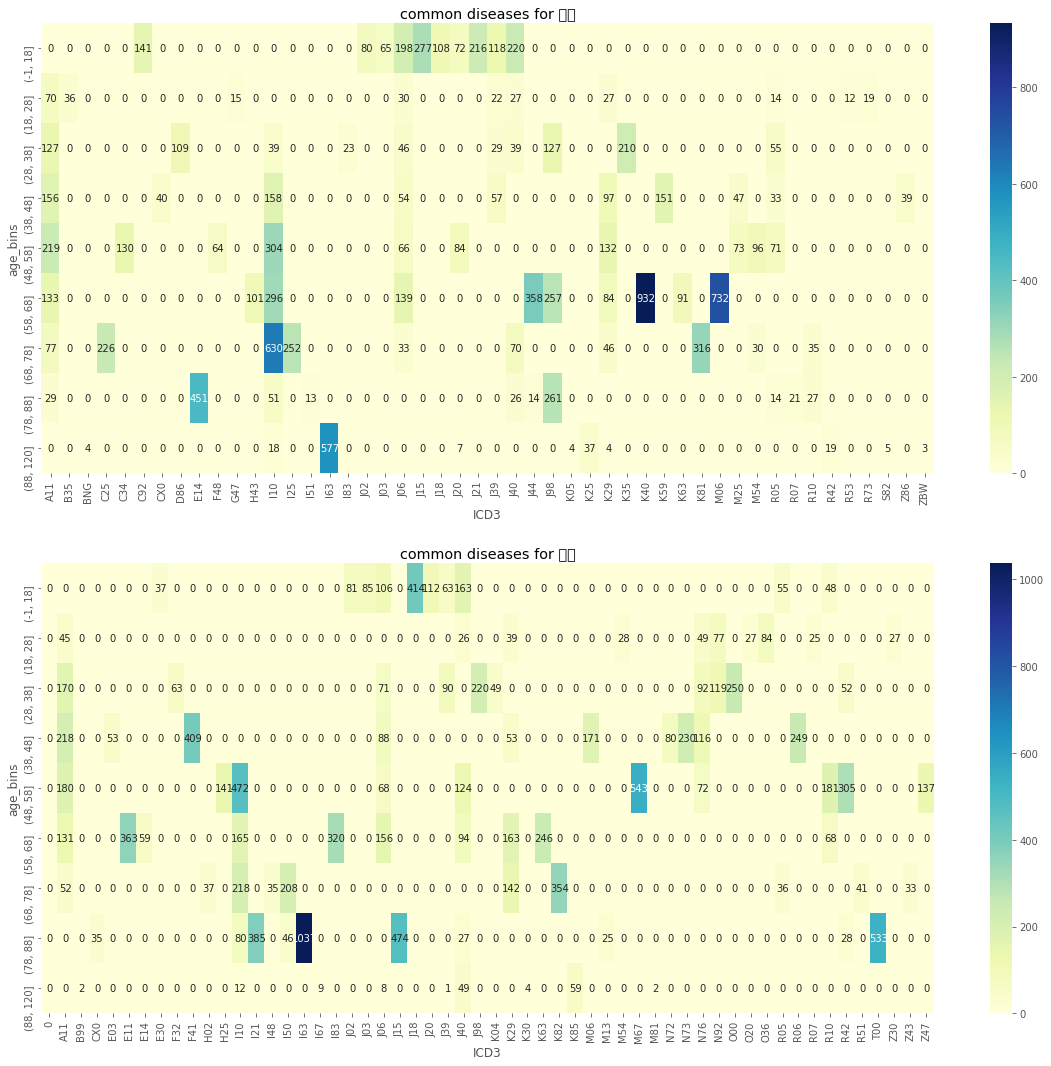

In [124]:

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
plt.subplots_adjust(top = 1.5  )
for sex, subplot in zip(['男','女'], ax.flatten()):
    
    common_disease = data[data.sex==sex].groupby(['age_bins','ICD3'])[['register_no']].count().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('register_no',ascending=False).head(10)).reset_index()
    common_disease_pv = common_disease.pivot(index='age_bins',columns='ICD3', values='register_no').fillna(0)
    sns.heatmap(common_disease_pv, annot=True, fmt='.0f', cmap="YlGnBu",ax=subplot).set_title(f'common diseases for ：{sex}')



In [ ]:
重复收费：
1. 